In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np

import sympy as sp
import re

sys.path.append("../run/")
import BondGraph as bg



 ## Example 2 
 
 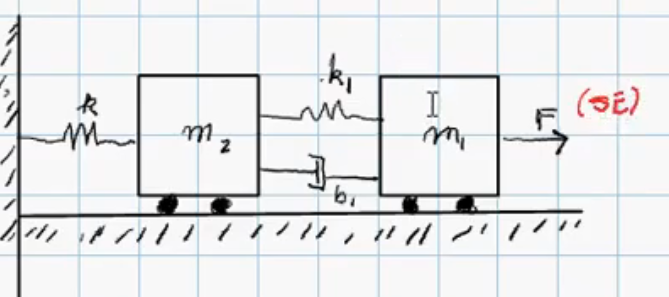

#We create the components of the bondgraph model (nodes, ports and edges)

In [2]:
model2 = bg.BondGraph(Name ='Serial 2 mass connection with 2 springs and one demper and ground connection + external force')

#Create some elements
SE_2 = bg.BGelement('SE', Position=[0,3])
SF_2 = bg.BGelement('SF', Position=[2,1])

C_2 = bg.BGelement('C', Position=[3,6])
C_3 = bg.BGelement('C', Position=[3,5])
R_2 = bg.BGelement('R', Position=[3,4])
I_2 = bg.BGelement('I', Position=[0,3])
I_3 = bg.BGelement('I', Position=[0,4])

OneJ_4 = bg.BGelement('1', Position=[0,1])
OneJ_5 = bg.BGelement('1', Position=[2,1])
OneJ_6 = bg.BGelement('1', Position=[2,0])
OneJ_7 = bg.BGelement('1', Position=[0,1])
OneJ_8 = bg.BGelement('1', Position=[1,1])


ZeroJ_2 = bg.BGelement('0', Position=[2,2])
ZeroJ_3 = bg.BGelement('0', Position=[4,2])

# Add the created elements to the model
model2.addElement(OneJ_4)
model2.addElement(OneJ_5)
model2.addElement(OneJ_6)
model2.addElement(OneJ_7)
model2.addElement(OneJ_8)

model2.addElement(ZeroJ_2)
model2.addElement(ZeroJ_3)

model2.addElement(C_2)
model2.addElement(C_3)
model2.addElement(R_2)
model2.addElement(I_2)
model2.addElement(I_3)
model2.addElement(SE_2)
model2.addElement(SF_2)

# add a connections between elements in model
model2.connect(SE_2, OneJ_4)
model2.connect(I_2, OneJ_4)
model2.connect(OneJ_4, ZeroJ_2)
model2.connect(ZeroJ_2, OneJ_5)
model2.connect(ZeroJ_2, OneJ_6)
model2.connect(C_2, OneJ_6)
model2.connect(R_2, OneJ_6)
model2.connect(OneJ_5, I_3)
model2.connect(OneJ_5, ZeroJ_3)
model2.connect(OneJ_7, ZeroJ_3)
model2.connect(C_3, OneJ_7)

model2.connect(OneJ_8, ZeroJ_3)
model2.connect(OneJ_8, SF_2)

In [3]:

# Set positions automatically for drawing (automatically done, but not ideally)
model2.render()


In [4]:
OneJ_8.setPosition([7,2])
OneJ_6.setPosition([0,2])
R_2.setPosition([-1,2])
C_2.setPosition([-1,3])
SE_2.setPosition([-1,-1])
C_3.setPosition([4,-1])
I_2.setPosition([1,0])
I_3.setPosition([0,4])

In [5]:
#we can get the position of element on the picture
OneJ_5.getPosition()

[1, 3]

WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...
WARNING 005: Some causality lost in drawings...


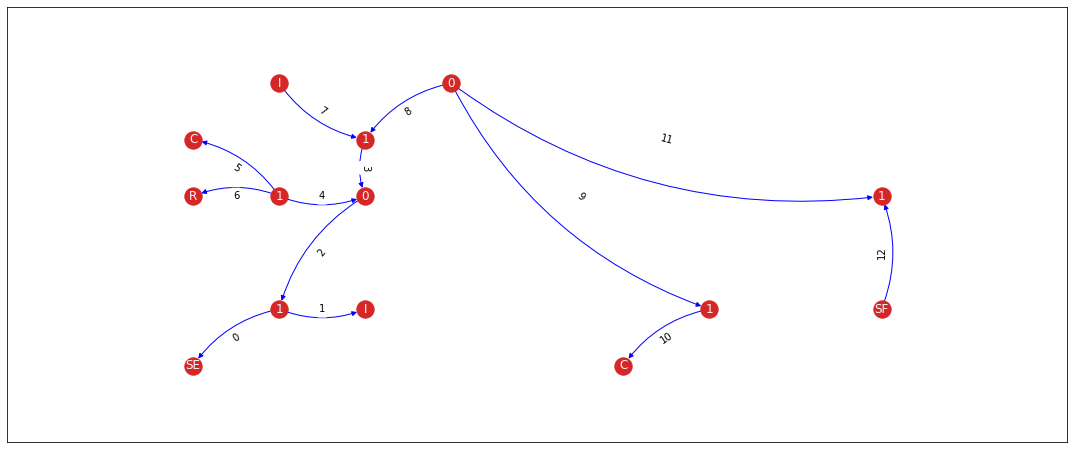

In [6]:
model2.draw()

In [7]:
model2.applyRules()

NB! None val
NB! None val
NB! None val
NB! None val
NB! None val
NB! None val
NB! None val
NB! None val
NB! None val
NB! None val
NB! None val
NB! None val


In [8]:
model2.show_ports_state()

Element name:  1_7
++ port_id: 1 |  arrow:  Input |  causality:  Causal
++ port_id: 3 |  arrow:  Output |  causality:  Uncausal
++ port_id: 4 |  arrow:  Output |  causality:  Causal
Element name:  1_8
++ port_id: 7 |  arrow:  Input |  causality:  Causal
++ port_id: 14 |  arrow:  Output |  causality:  Uncausal
++ port_id: 16 |  arrow:  Output |  causality:  Causal
Element name:  1_9
++ port_id: 9 |  arrow:  Input |  causality:  Uncausal
++ port_id: 11 |  arrow:  Output |  causality:  Causal
++ port_id: 13 |  arrow:  Output |  causality:  Causal
Element name:  1_10
++ port_id: 18 |  arrow:  Input |  causality:  Uncausal
++ port_id: 21 |  arrow:  Output |  causality:  Causal
Element name:  1_11
++ port_id: 22 |  arrow:  Input |  causality:  Causal
++ port_id: 24 |  arrow:  Output |  causality:  Uncausal
Element name:  0_12
++ port_id: 5 |  arrow:  Input |  causality:  Uncausal
++ port_id: 6 |  arrow:  Output |  causality:  Uncausal
++ port_id: 8 |  arrow:  Output |  causality:  Causal
Ele

In [9]:
model2.assign_equations()
equastions = model2.get_model_equations()

Express: not found the variable, inverse variable check
Express: not found the variable, inverse variable check
Express: not found the variable, inverse variable check
Express: not found the variable, inverse variable check
Express: not found the variable, inverse variable check


In [10]:
equastions

['+e0=+SE0',
 '+f0=+f1=+f2',
 '+e1=+e0-e2',
 '+f1=+1/I5*p5',
 '+e2=+e3=+e4',
 '+f0=+f1=+f2',
 '+e3=+e7+e8',
 '+f3=+f7=+f8',
 '+e4=+e5+e6',
 '+f4=+f2-f3',
 '+e5=+1/C2*q2',
 '+f4=+f5=+f6',
 '+e6=+R4*f6',
 '+f4=+f5=+f6',
 '+e7=+e3-e8',
 '+f7=+1/I6*p6',
 '+e8=+e9=+e11',
 '+f3=+f7=+f8',
 '+e9=+e10',
 '+f9=+f8-f11',
 '+e10=+1/C3*q3',
 '+f9=+f10',
 '+e11=+e12',
 '+f11=+f12',
 '+e12=+e11',
 '+f12=+SF1']

In [12]:
cauchy_state_equastions, variables_exp = model2.cauchy_form_equastions_sequence()
#just show
print("############## STATE EQUASIONS ############")
for i in cauchy_state_equastions.keys():
    print(i, '=', cauchy_state_equastions[i])
print("####################################################")
print(cauchy_state_equastions, model2.state_variables)

Express: not found the variable, inverse variable check
Express: not found the variable, inverse variable check
Express: not found the variable, inverse variable check
Express: not found the variable, inverse variable check
Express: not found the variable, inverse variable check
capacitor_variables = {'dq2/dt': f5, 'dq3/dt': f10, 'dp5/dt': e1, 'dp6/dt': e7} input_variables= [SE0, SF1] state_variables= [q2, q3, p5, p6] parameter_variables= [C2, C3, R4, I5, I6]
capacitor_variables= {'dq2/dt': f5, 'dq3/dt': f10, 'dp5/dt': e1, 'dp6/dt': e7}
final_vars= [SE0, SF1, q2, q3, p5, p6, C2, C3, R4, I5, I6]
dq2/dt =
variables list = {f5}
dq3/dt =
variables list = {f10}
dp5/dt =
variables list = {e1}
dp6/dt =
variables list = {e7}
############## STATE EQUASIONS ############
dq2/dt = -p6/I6 + p5/I5
dq3/dt = -SF1 + p6/I6
dp5/dt = -R4*(-p6/I6 + p5/I5) + SE0 - q2/C2
dp6/dt = R4*(-p6/I6 + p5/I5) - q3/C3 + q2/C2
####################################################
{'dq2/dt': -p6/I6 + p5/I5, 'dq3/dt': -SF1

In [13]:
model2.make_state_statespace(cauchy_state_equastions)
print(f'Matrix A: {model2.A} \n Matrix B: {model2.B}\n input_variables: {model2.input_variables} \n state_variables: {model2.state_variables}')

--------------------------- q2
args= p5/I5
args= -p6/I6
args= p6
args= 1/I6
args= -q2/C2
component----------= -1/C2
args= R4*p6/I6
args= -R4*p5/I5
args= q2/C2
component----------= 1/C2
args= -q3/C3
args= R4*p5/I5
args= -R4*p6/I6
--------------------------- q3
args= p5/I5
args= -p6/I6
args= p6
args= 1/I6
args= -q2/C2
args= R4*p6/I6
args= -R4*p5/I5
args= q2/C2
args= -q3/C3
component----------= -1/C3
args= R4*p5/I5
args= -R4*p6/I6
--------------------------- p5
args= p5/I5
component----------= 1/I5
args= -p6/I6
args= p6
args= 1/I6
args= -q2/C2
args= R4*p6/I6
args= -R4*p5/I5
component----------= -R4/I5
args= q2/C2
args= -q3/C3
args= R4*p5/I5
component----------= R4/I5
args= -R4*p6/I6
--------------------------- p6
args= p5/I5
args= -p6/I6
component----------= -1/I6
args= p6
error component----------= 1/I6
args= 1/I6
args= -q2/C2
args= R4*p6/I6
component----------= R4/I6
args= -R4*p5/I5
args= q2/C2
args= -q3/C3
args= R4*p5/I5
args= -R4*p6/I6
component----------= -R4/I6
---------------------

In [14]:
model2.A

Matrix([
[-1/C2, -1/C3,   1/I5,  -1/I6],
[ 1/C2,     0, -R4/I5,   1/I6],
[    0,     0,  R4/I5,  R4/I6],
[    0,     0,      0, -R4/I6]])

In [15]:
model2.B

Matrix([
[0, -1],
[0,  0],
[0,  0],
[0,  0]])

In [16]:
# Enter for example e7,f7
cauchy_form_output_eq = model2.cauchy_form_output_eq(variables_exp)
model2.make_output_statespace(cauchy_form_output_eq)

Input the names of output variables:
It mast be in list eff_flows:  [f6, f3, f12, f2, f7, e8, f8, e1, f9, f0, f5, e6, e2, e12, e4, f11, f4, e11, e5, f1, e9, e3, f10, e7, e10, e0] (Velocity of Force at some point)


 e7,f7


U entered this:  ['e7', 'f7']
output variable=  e7
first match [e3 - e8]
next iteration with expression: e2 - e9
next iteration with expression: -e10 + e4
next iteration with expression: e5 + e6 - q3/C3
next iteration with expression: R4*f6 - q3/C3 + q2/C2
next iteration with expression: R4*f4 - q3/C3 + q2/C2
next iteration with expression: R4*(f2 - f3) - q3/C3 + q2/C2
next iteration with expression: R4*(f0 - f7) - q3/C3 + q2/C2
next iteration with expression: R4*(f1 - p6/I6) - q3/C3 + q2/C2
next iteration with expression: R4*(-p6/I6 + p5/I5) - q3/C3 + q2/C2
output variable=  f7
first match [p6/I6]
--------------------------- q2
args= q2/C2
component----------= 1/C2
args= -q3/C3
args= R4*p5/I5
args= -R4*p6/I6
args= 1/I6
args= p6 - 1
--------------------------- q3
args= q2/C2
args= -q3/C3
component----------= -1/C3
args= R4*p5/I5
args= -R4*p6/I6
args= 1/I6
args= p6 - 1
--------------------------- p5
args= q2/C2
args= -q3/C3
args= R4*p5/I5
component----------= R4/I5
args= -R4*p6/I6
args=

In [17]:
model2.C

Matrix([
[1/C2, -1/C3, R4/I5, -R4/I6],
[   0,     0,     0,      0]])

In [18]:
model2.D

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [18]:
model2.state_variables

[q2, q3, p5, p6]

In [19]:
print('List of system parameters:', model2.parameter_variables)
parameters_list = model2.parameter_variables

List of system parameters: [C2, C3, R4, I5, I6]


In [20]:
parameters_values = [10, 2, 20, 30, 4]

In [21]:
# initial state
initial_state = np.zeros((len(model2.state_variables), 1))
print("initial_state: ", initial_state)
time_steps=400
sampling_period = 0.5
input_sequence = np.ones((time_steps, len(model2.input_variables)))
# print("input_sequence: ", input_sequence)

initial_state:  [[0.]
 [0.]
 [0.]
 [0.]]


In [23]:
# initial state
initial_state = np.zeros((len(state_variables), 1))
print("initial_state: ", initial_state)
time_steps=400
sampling_period = 0.5
input_sequence = np.ones((time_steps, len(input_variables)))
# print("input_sequence: ", input_sequence)

initial_state:  [[0.]
 [0.]
 [0.]
 [0.]]


Text(0.5, 1.0, 'System step response')

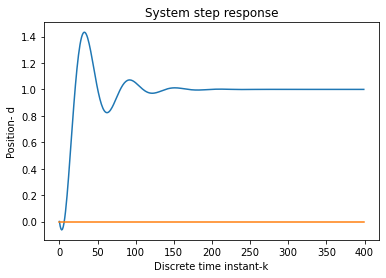

In [22]:
state, output = model2.simulate(initial_state, input_sequence, time_steps, sampling_period, parameters_values)     

plt.plot(output[0,:-1])
plt.plot(output[1,:-1])
plt.xlabel('Discrete time instant-k')
plt.ylabel('Position- d')
plt.title('System step response')